## Importing libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

In [3]:
from xgboost import XGBClassifier

In [4]:
# from imblearn.under_sampling import NearMiss
# from imblearn.over_sampling import RandomOverSampler

## Problem Statement

Credit risk is associated with the possibility of a client failing to meet contractual obligations,
such as mortgages, credit card debts, and other types of loans. The dataset contains transactions
made by credit cards in September 2013 by European cardholders. This dataset presents
transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all
transactions. These datasets are hard to handle. You have to predict whether, given the details
about the credit card, it is real or fake.

## Loading dataset and preprocessing

In [5]:
df = pd.read_csv('creditcard.csv')
df_raw = df.copy()

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking the number of NULL data entries (if any)

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Number of unique class labels and their corresponding number of data points

In [9]:
classes = df.Class.unique()
print(list(classes))
classes_sum = [df[df['Class']==x].shape[0] for x in classes]
print(classes_sum)

[0, 1]
[284315, 492]


### Plotting Correlation Heatmap

In [10]:
df_corr = df.corr()

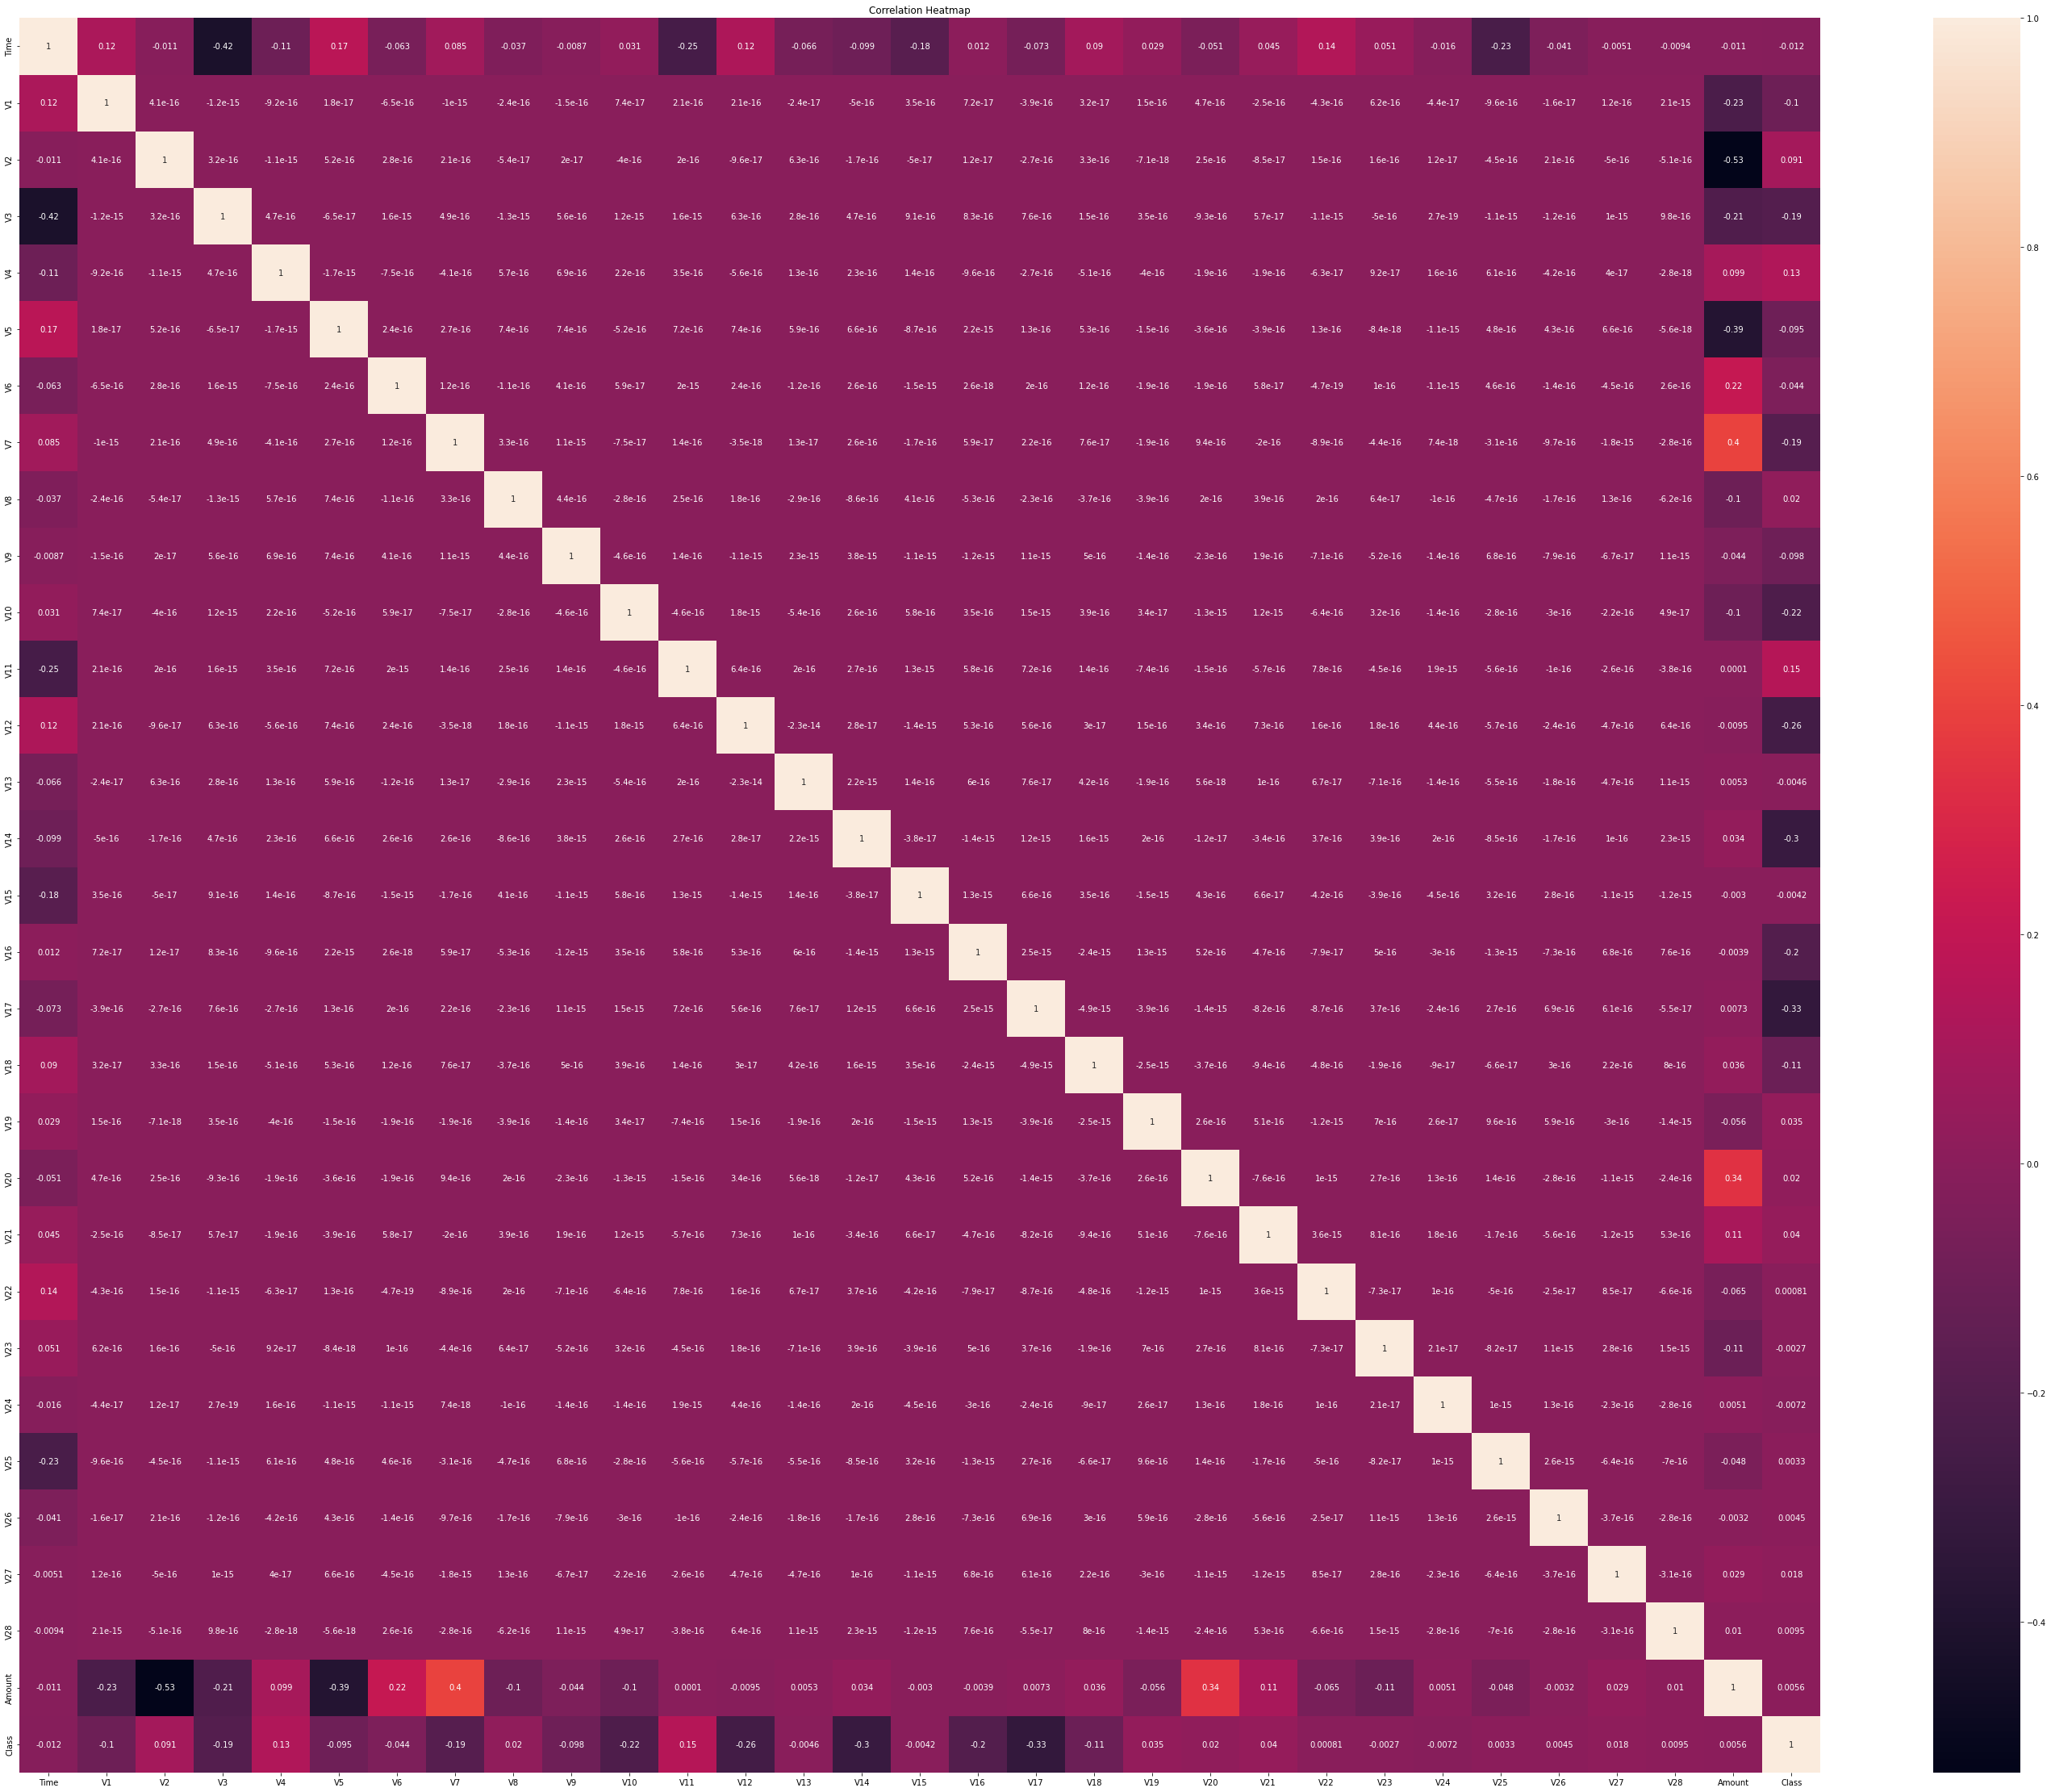

In [11]:
fig = plt.figure(figsize=(50,40))
sns.heatmap(df_corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Data Visualization

### Plotting dataset histogram

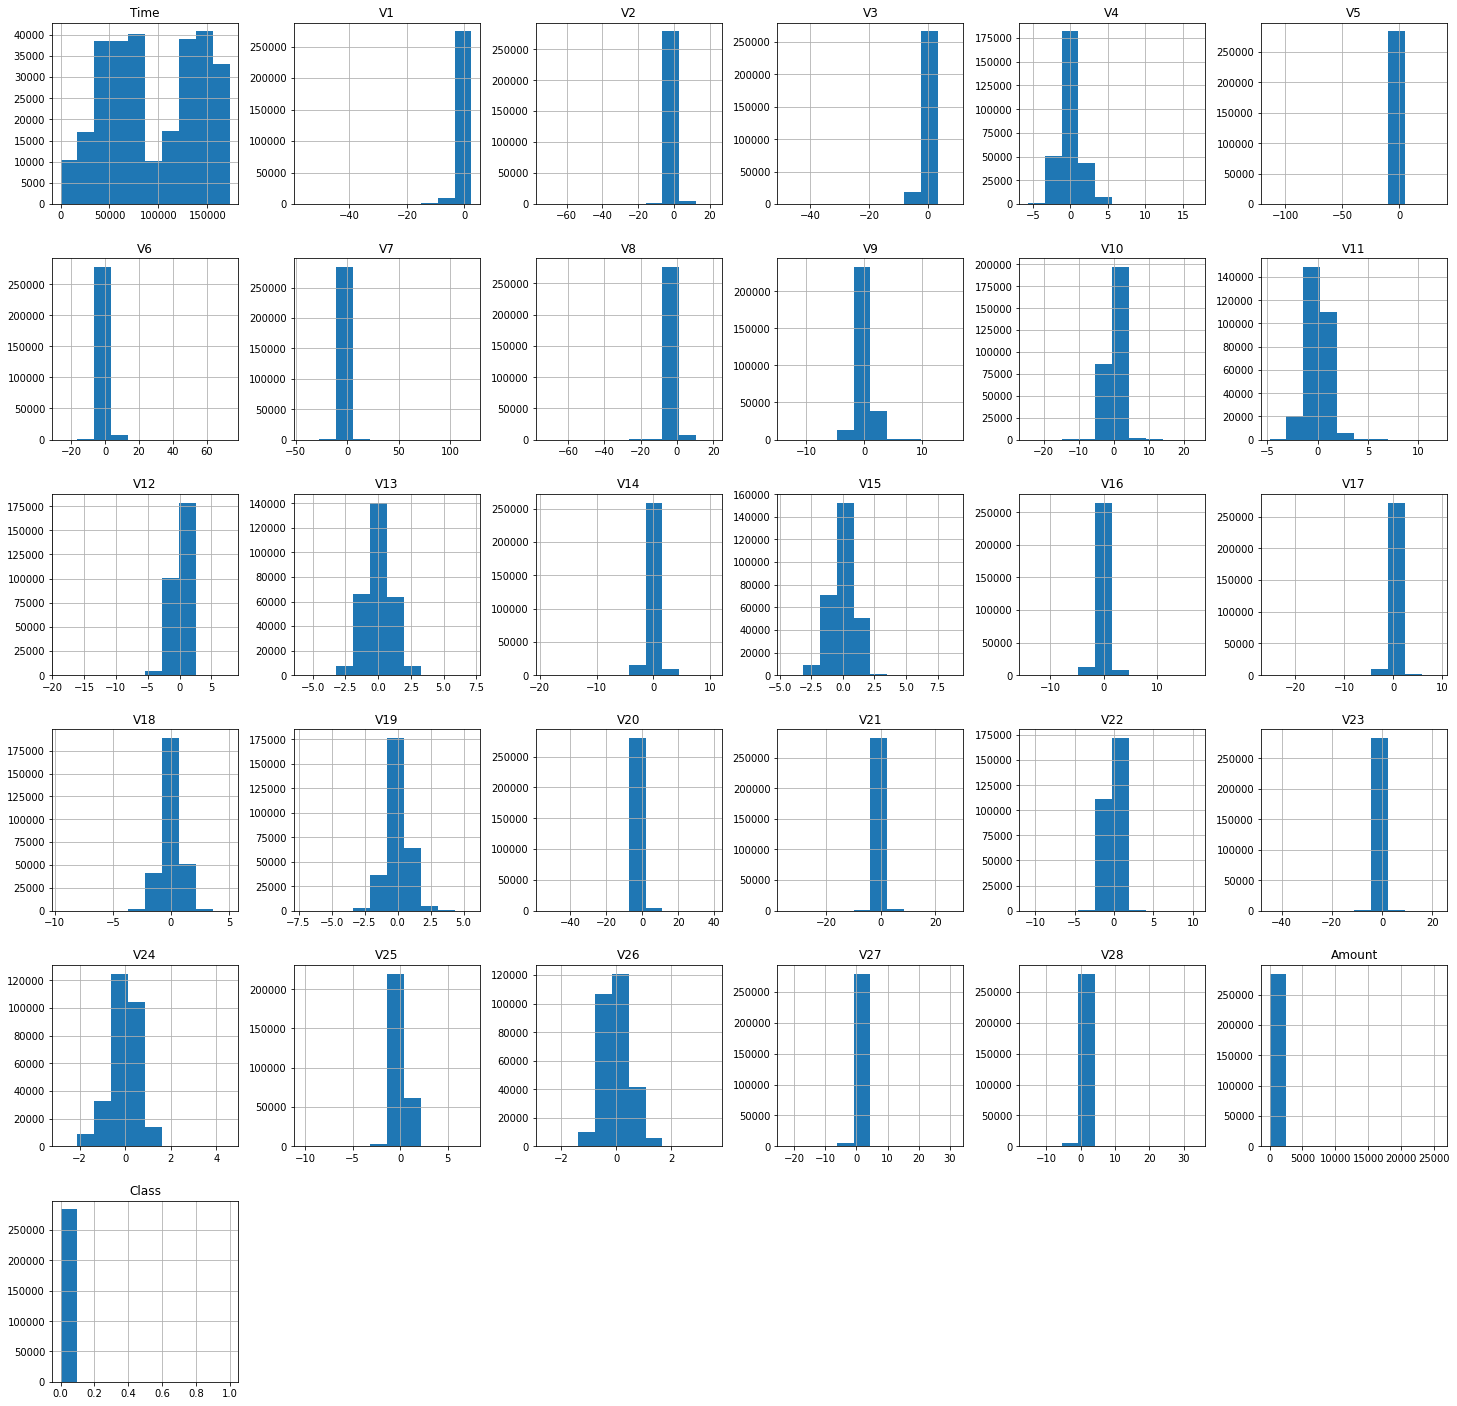

In [12]:
df.hist(figsize=(25,25))
plt.show()

### Plotting counts of class labels

In [13]:
def plot_counts(df, feature):
    '''
    Input: dataframe, feature
    
    Plots the number of counts for each unique entry in the input feature column of the input dataframe
    '''
    uniquearray = df[feature].unique()
    
    uniquedict = dict()
    for each in uniquearray:
        uniquedict[each] = df[df[feature]==each].shape[0]
        
    names = list(uniquedict.keys())
    values = list(uniquedict.values())
    
    plt.bar(range(len(uniquearray)), values, tick_label=names)
    plt.ylabel('count')
    plt.xlabel(feature)
    
    for each in range(len(uniquearray)):
        plt.text(each, values[each]+3000, values[each], ha = 'center')
    
    plt.show()
    

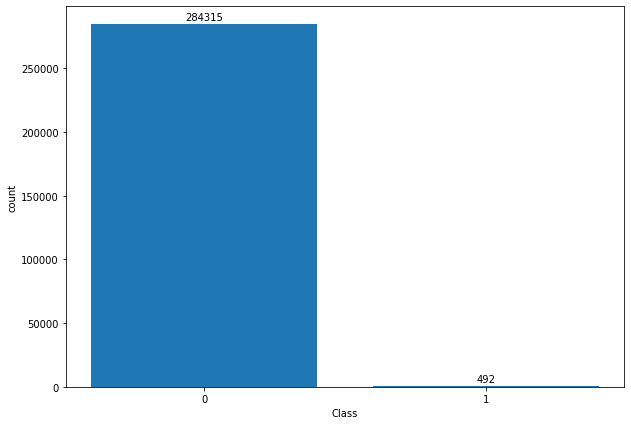

In [14]:
fig = plt.figure(figsize=(10, 7))
plot_counts(df, 'Class')

### Dropping the unneccessary columns (not useful in training the model)

In [15]:
columns_dropped = ['Time']

In [16]:
df = df.drop(columns=columns_dropped, axis=1)

In [17]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [19]:
features = df.columns.tolist()[:-1]
# features

### Applying standardization on the dataset

In [20]:
scaler = StandardScaler()

In [21]:
X = df.copy()[features]
y = df.Class

In [22]:
X['Amount'] = scaler.fit_transform(np.array(X['Amount']).reshape(-1,1))
# X_scaled = scaler.fit_transform(X)
# X_scaled = X.copy()
# X_unscaled = X.copy()
# X_scaled = pd.DataFrame(X_scaled)
# X_scaled.columns = features
# X = X_scaled

In [23]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


### Train-test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
df_train = X_train.copy()
df_train['Class'] = y_train

df_test = X_test.copy()
df_test['Class'] = y_test

## Outlier removal (using Isolation Forest method)

In [26]:
df_out = df_raw.copy()

In [27]:
X_out = df_out.drop(['Class'], axis=1)
y_out = df_out['Class']

In [28]:
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01),max_features=0.1)
iso_forest.fit(df_out)

IsolationForest(contamination=0.01, max_features=0.1)

In [29]:
scores = iso_forest.decision_function(df_out)

In [30]:
y_pred_out = iso_forest.predict(df_out)

In [31]:
df_out['scores'] = scores

In [32]:
df_out['is_outlier'] = y_pred_out

In [33]:
print('Number of anomalies detected:', sum(df_out['is_outlier'] == -1))

Number of anomalies detected: 2849


### Before outlier removal

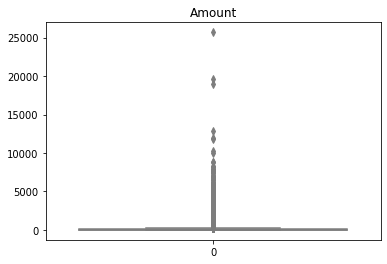

In [34]:
sns.boxplot(data=df_raw['Amount'], color="#a2d2ff").set_title("Amount")

plt.tight_layout
plt.show()

### After outlier removal

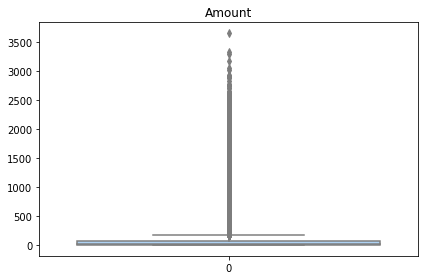

In [35]:
anomaly = df_out.loc[df_out['is_outlier']==-1]
anomaly_index = list(anomaly.index)

df_out = df_out.drop(anomaly_index, axis = 0).reset_index(drop=True)

sns.boxplot(data=df_out['Amount'], color="#a2d2ff").set_title('Amount')

plt.tight_layout()
plt.show()

# Methods to handle imbalanced dataset

In [36]:
def Visualizing(d, target):
    '''
    Input: training dataset and labels
    
    Plots the scatter plot of transformed input datapoints for each class
    after applying PCA (n_components=2) on the input data
    '''
    pca = PCA(n_components=2)
    dataset = pca.fit_transform(d)
    # print(dataset)
    d = pd.DataFrame(data=dataset, columns=['x1','x2'])
    y = pd.DataFrame(data=target, columns=['Class']).reset_index(drop=True)

    plt.figure(figsize=(7,7))
    plt.scatter(d['x1'][y.Class==1], d['x2'][y.Class==1], color='red')
    plt.scatter(d['x1'][y.Class==0], d['x2'][y.Class==0], color='blue')
    plt.show()
    

In [37]:
def PCA_KNN(X_train, y_train, X_test, y_test, n_neighbors=2):
    '''
    Input: training dataset and labels, test dataset and labels, n_neighbors for KNN classifier
    
    Applies PCA(n_components=2) on the input training dataset and uses it to transform test dataset,
    displays results of classification on the transformed test data using KNN classifier
    '''
    pca = PCA(n_components=2)
    dataset = pca.fit_transform(X_train)
    d = pd.DataFrame(data=dataset, columns=['x1','x2'])

    X_test_pca = pca.transform(X_test)

    knn = KNN(n_neighbors=1)
    knn.fit(d, y_train)
    y_pred = knn.predict(X_test_pca)
    print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'\nf1-score: {f1_score(y_test, y_pred)}')
    print('\nClassification report:-')
    print(classification_report(y_test, y_pred))
    

## Undersamping (from scratch)

In [38]:
count_class_0, count_class_1 = df_train.Class.value_counts()

df_class_0 = df_train[df_train['Class'] == 0]
df_class_1 = df_train[df_train['Class'] == 1]

In [39]:
df_class_0_US = df_class_0.sample(count_class_1)
df_US = pd.concat([df_class_0_US, df_class_1], axis=0)

print('Random Under-sampling:')
print(df_US.Class.value_counts())

X_train_US = df_US.drop('Class',axis='columns')
y_train_US = df_US['Class']

Random Under-sampling:
0    394
1    394
Name: Class, dtype: int64


In [40]:
# ns = NearMiss(sampling_strategy=1)
# X_train_US, y_train_US = ns.fit_resample(X_train, y_train)

print(f'The number of classes before fit {Counter(y_train)}')
print(f'The number of classes after fit {Counter(y_train_US)}')

The number of classes before fit Counter({0: 227451, 1: 394})
The number of classes after fit Counter({0: 394, 1: 394})


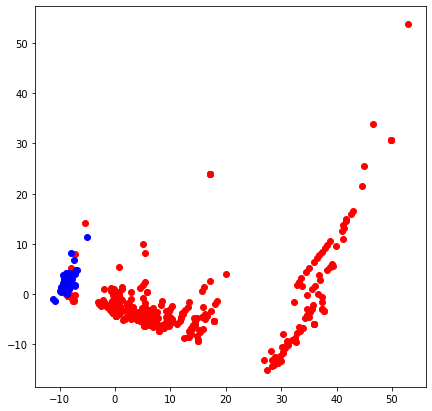

In [41]:
Visualizing(X_train_US, y_train_US)

In [42]:
PCA_KNN(X_train_US, y_train_US, X_test, y_test, n_neighbors=10)

accuracy score: 0.9173308521470454

f1-score: 0.03721120425270905

Classification report:-
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.93      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.92      0.96     56962



## Oversampling (from scratch)

In [43]:
df_class_1_OS = df_class_1.sample(int(count_class_0*.75), replace=True)
df_OS = pd.concat([df_class_0, df_class_1_OS], axis=0)

print('Random over-sampling:')
print(df_OS.Class.value_counts())
X_train_OS = df_OS.drop(columns=['Class'])
y_train_OS = df_OS.Class

Random over-sampling:
0    227451
1    170588
Name: Class, dtype: int64


In [44]:
# os = RandomOverSampler(sampling_strategy=0.75)
# X_train_OS, y_train_OS = os.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_OS)))

The number of classes before fit Counter({0: 227451, 1: 394})
The number of classes after fit Counter({0: 227451, 1: 170588})


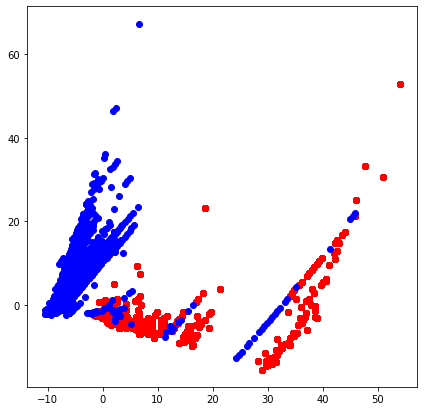

In [45]:
Visualizing(X_train_OS, y_train_OS)

In [46]:
PCA_KNN(X_train_OS, y_train_OS, X_test, y_test)

accuracy score: 0.9991397773954567

f1-score: 0.7434554973821991

Classification report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.72      0.74        98

    accuracy                           1.00     56962
   macro avg       0.88      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



## Self-written customized functions for showing the results of classification techniques

In [47]:
def plot_confusion_matrix(conf_mat):
    '''
    Input: numpy array of confusion matrix
    
    Displays the confustion matrix heatmap of the input confusion matrix
    '''
    group_names = ['True Negatives','False Postives','False Negatives','True Positives']
    group_counts = [f'{value}' for value in conf_mat.flatten()]
    group_percentages = [f'{round(value, 5)}%' for value in conf_mat.flatten()/np.sum(conf_mat)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')


In [48]:
def return_classification_results(model, X_train, y_train, X_test, y_test):
    '''
    Input: classifier model, train datasets and labels, test datasets and labels
    
    Displays the classification results of the model trained on the input training input on the test input
    '''
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f'accuracy score: {model.score(X_test, y_test)}')
    print(f'\nf1 score: {f1_score(y_test, y_pred)}')
    
    print('\nConfusion Matrix:-')
    fig = plt.figure(figsize=(5, 3))
    conf_mat = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat)
    plt.show()
    
    print('\nClassification Report:-')
    print(classification_report(y_test, y_pred))
    

## Linear Discriminant Analysis

In [49]:
def lda_testing(X_train, y_train, X_test, y_test, n_components=None):
    '''
    Input: training data and labels, test data and labels,
           number of components (default value = None)
    
    Trains a linear discriminant analysis model on the training inputs
    and returns the results of the classification performed on the testing inputs
    '''
    model = LinearDiscriminantAnalysis(n_components=n_components)
    return_classification_results(model, X_train, y_train, X_test, y_test)


## Random Forest Classifier

In [50]:
def RandomForest_testing(X_train, y_train, X_test, y_test, n_estimators=100):
    '''
    Input: training data and labels, test data and labels, number of estimators
    
    Trains a random forest classifier model on the training inputs
    and returns the results of the classification performed on the testing inputs
    '''
    model = RandomForestClassifier(n_estimators=n_estimators)
    return_classification_results(model, X_train, y_train, X_test, y_test)


## Bagging Classifier

In [51]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()

def bagging_testing(X_train, y_train, X_test, y_test, n_estimators=100, estimator=DTC):
    '''
    Input: training data and labels, test data and labels, number of estimators
    
    Trains a random bagging classifier model on the training inputs
    and returns the results of the classification performed on the testing inputs
    '''
    model = BaggingClassifier(base_estimator=estimator, n_estimators=n_estimators)
    return_classification_results(model, X_train, y_train, X_test, y_test)


## XGBoost Classifier

In [52]:
def xgboost_testing(X_train, y_train, X_test, y_test, n_estimators=100):
    '''
    Input: training data and labels, test data and labels, number of estimators
    
    Trains a xgboost classifier model on the training inputs
    and returns the results of the classification performed on the testing inputs
    '''
    model = XGBClassifier(n_estimators=n_estimators)
    return_classification_results(model, X_train, y_train, X_test, y_test)


## Self-implemented Ensemble Methods (from scratch)

In [53]:
def return_randomforest(train_X, train_y, n_estimators=100):
    '''
    Input: training data and label, number of estimators
    
    Returns a random forest classifier model trained on the input data
    '''
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(train_X, train_y)
    
    return model


In [54]:
def voting_classifier(test_X, test_y, estimators):
    '''
    Input: testing data and labels,
           estimator models to be used in the voting classifier
           
    Displays the classification results of the voting classifier on the test data,
    the voting classifier returns the most occuring prediction out of each of the estimator models
    on each of the data entries of the test input
    '''
    y_preds = list()
    for each in range(len(estimators)):
        y_pred = estimators[each].predict(test_X)
        y_preds.append(y_pred)
        
    y_preds = np.array(y_preds)
    
    voting_results = list()
    
    for each in range(len(y_preds.T)):
        counts = np.bincount(y_preds.T[each])
        voting_results.append(np.argmax(counts))
    
    print(f'accuracy score: {accuracy_score(test_y, voting_results)}')
    print(f'\nf1 score: {f1_score(test_y, voting_results)}')
    
    print('\nConfusion Matrix:-')
    fig = plt.figure(figsize=(5, 3))
    conf_mat = confusion_matrix(test_y, voting_results)
    plot_confusion_matrix(conf_mat)
    plt.show()
    
    print('\nClassification Report:-')
    print(classification_report(y_test, y_pred))
    

In [55]:
def fraud_dataset(df_train, y_train):
    '''
    Input: train data with labels, train labels
    
    Returns train dataframe containing only fraud data entries (Class=1)
    '''
    df_fraud = df_train[y_train==1].copy()
    return df_fraud


In [56]:
def not_fraud_dataset(df_train, y_train):
    '''
    Input: train data with labels, train labels
    
    Returns train dataframe containing only non-fraud data entries (Class=0)
    '''
    df_notfraud = df_train[y_train==0].copy()
    df_notfraud = df_notfraud.sample(frac=1)
    return df_notfraud


In [57]:
def Ensemble_Classifier_1(num, df_fraud, df_notfraud, X_test, y_test, features, class_label):
    '''
    Input: number of splits, fraud data points, non-fraud data points,
           test dataset and labels, array containing feature names, label of the class column in the dataframe
           
    Displays the result of our first ensemble approach,
    the approach deals with splitting the non-fraud datapoints from the training set into desired number of splits
    and concatenating each of the split with all the fraud datapoints of the training set and then using each split for
    training random forest classifiers which are further used as estimators in the previously implemented voting classifier
    '''
    dim = df_notfraud.shape[0]

    dataframes = list()
    start = 0
    Dim = dim//num

    for each in range(num):
        if each == num-1:
            dataframes.append(df_notfraud.iloc[start:dim].copy())
        else:
            dataframes.append(df_notfraud.iloc[start:start+Dim].copy())

        df_temp = dataframes[each].copy()
        df_temp = df_temp.append(df_fraud, ignore_index=True)
        df_temp = df_temp.sample(frac=1)
        dataframes[each] = df_temp

        start += Dim
        
    estimators_voting = list()

    for each in range(num):
        temp = dataframes[each].copy()
        temp_X = temp[features]
        temp_y = temp['Class']

        model = return_randomforest(temp_X, temp_y, n_estimators=10)
        estimators_voting.append(model)
        
    voting_classifier(X_test, y_test, estimators=estimators_voting)


In [58]:
def Ensemble_Classifier_2(num, df_fraud, df_notfraud, X_test, y_test, features, class_label):
    '''
    Displays the result of our second ensemble approach,
    the approach deals with splitting the non-fraud datapoints and fraud datapoints from the training set into 
    desired number of splits and concatenating each of the split with one of the fraud datapoint split of the 
    training set and then using each of the split for training random forest classifiers which are further used as 
    estimators in the previously implemented voting classifier
    '''
    fraud_dim = df_fraud.shape[0]
    notfraud_dim = df_notfraud.shape[0]

    start = 0
    fraudDim = fraud_dim//num

    fraud_dataframes = []

    for each in range(num):
        if each == num-1:
            fraud_dataframes.append(df_fraud.iloc[start:fraud_dim].copy())
        else:
            fraud_dataframes.append(df_fraud.iloc[start:start+fraudDim].copy())

        start += fraudDim


    start = 0
    notFraudDim = notfraud_dim//num

    dataframes = []

    for each in range(num):
        if each == num-1:
            dataframes.append(df_notfraud.iloc[start:notfraud_dim].copy())
        else:
            dataframes.append(df_notfraud.iloc[start:start+notFraudDim].copy())

        df_temp = dataframes[each].copy()
        df_temp = df_temp.append(fraud_dataframes[each], ignore_index=True)
        df_temp = df_temp.sample(frac=1)
        dataframes[each] = df_temp

        start += notFraudDim
        
    estimators_voting = []

    for each in range(num):
        temp = dataframes[each].copy()
        temp_X = temp[features]
        temp_y = temp['Class']

        model = return_randomforest(temp_X, temp_y, n_estimators=10)

        estimators_voting.append(model)
        
    voting_classifier(X_test, y_test, estimators=estimators_voting)


# Classifier Models testing on the dataset and the ttransformed datasets

## LDA

#### for standardized dataset

accuracy score: 0.9993679997191109

f1 score: 0.8021978021978022

Confusion Matrix:-


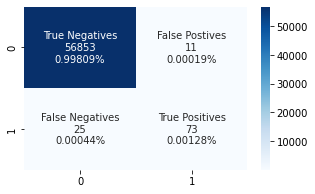


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.74      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
lda_testing(X_train, y_train, X_test, y_test)

#### for undersampled dataset

accuracy score: 0.9823566588251817

f1 score: 0.14175918018787362

Confusion Matrix:-


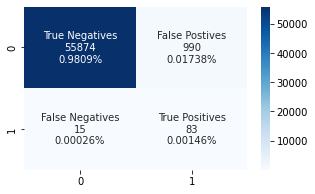


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.85      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [60]:
lda_testing(X_train_US, y_train_US, X_test, y_test)

#### for oversampled dataset

accuracy score: 0.9933815526140234

f1 score: 0.3031423290203327

Confusion Matrix:-


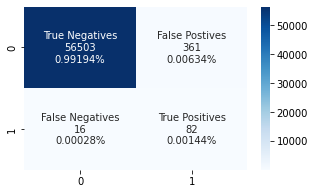


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.84      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.92      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [61]:
lda_testing(X_train_OS, y_train_OS, X_test, y_test)

---

## Random Forest

#### for standardized dataset

accuracy score: 0.9995611109160493

f1 score: 0.8603351955307262

Confusion Matrix:-


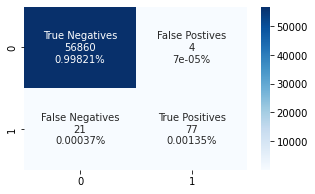


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [62]:
RandomForest_testing(X_train, y_train, X_test, y_test, n_estimators=25)

#### for undersampled dataset

accuracy score: 0.9646430953969313

f1 score: 0.08287795992714025

Confusion Matrix:-


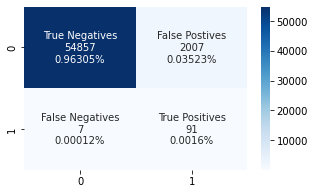


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [63]:
RandomForest_testing(X_train_US, y_train_US, X_test, y_test, n_estimators=25)

#### for oversampled dataset

accuracy score: 0.9995962220427653

f1 score: 0.8685714285714285

Confusion Matrix:-


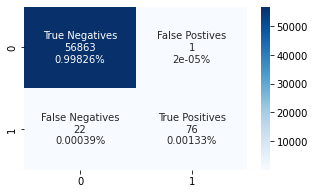


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [64]:
RandomForest_testing(X_train_OS, y_train_OS, X_test, y_test, n_estimators=25)

---

## Bagging

#### for standardized dataset

accuracy score: 0.9994908886626171

f1 score: 0.8342857142857143

Confusion Matrix:-


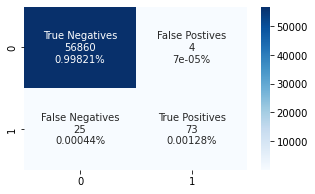


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [65]:
bagging_testing(X_train, y_train, X_test, y_test, n_estimators=10)

#### for undersampled dataset

accuracy score: 0.9541097573821143

f1 score: 0.06375358166189111

Confusion Matrix:-


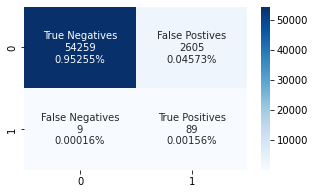


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.91      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [66]:
bagging_testing(X_train_US, y_train_US, X_test, y_test, n_estimators=10)

#### for oversampled dataset

accuracy score: 0.9994557775359011

f1 score: 0.8324324324324324

Confusion Matrix:-


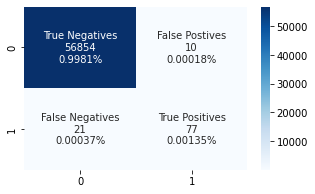


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.79      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [67]:
bagging_testing(X_train_OS, y_train_OS, X_test, y_test, n_estimators=10)

---

## XGBoost

#### for standardized dataset

accuracy score: 0.9995786664794073

f1 score: 0.8681318681318683

Confusion Matrix:-


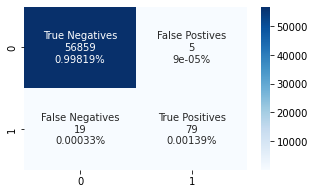


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [68]:
xgboost_testing(X_train, y_train, X_test, y_test, n_estimators=10)

#### for undersampled dataset

accuracy score: 0.9542150907622625

f1 score: 0.06456241032998565

Confusion Matrix:-


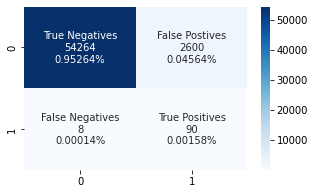


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [69]:
xgboost_testing(X_train_US, y_train_US, X_test, y_test, n_estimators=10)

#### for oversampled dataset

accuracy score: 0.9972086654260736

f1 score: 0.5107692307692308

Confusion Matrix:-


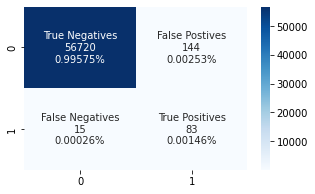


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.85      0.51        98

    accuracy                           1.00     56962
   macro avg       0.68      0.92      0.75     56962
weighted avg       1.00      1.00      1.00     56962



In [70]:
xgboost_testing(X_train_OS, y_train_OS, X_test, y_test, n_estimators=10)

---

## Ensemble Methods

#### for standardized dataset

accuracy score: 0.9994733330992591

f1 score: 0.845360824742268

Confusion Matrix:-


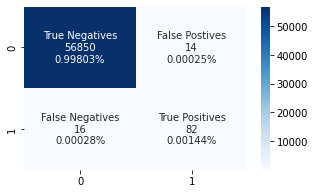


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.81      0.84        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------

accuracy score: 0.999385555282469

f1 score: 0.7953216374269005

Confusion Matrix:-


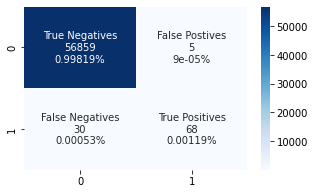


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.70      0.79        98

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [71]:
df_fraud = fraud_dataset(df_train, y_train)
df_notfraud = not_fraud_dataset(df_train, y_train)

Ensemble_Classifier_1(5, df_fraud, df_notfraud, X_test, y_test, features, 'Class')
print()
print('-'*100)
print()
Ensemble_Classifier_2(5, df_fraud, df_notfraud, X_test, y_test, features, 'Class')

#### for undersampled dataset

accuracy score: 0.8572030476457989

f1 score: 0.022120702091849

Confusion Matrix:-


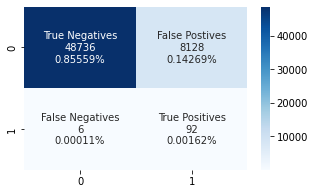


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     56864
           1       0.01      0.96      0.02        98

    accuracy                           0.83     56962
   macro avg       0.50      0.89      0.46     56962
weighted avg       1.00      0.83      0.90     56962


----------------------------------------------------------------------------------------------------

accuracy score: 0.9791439907306625

f1 score: 0.12903225806451613

Confusion Matrix:-


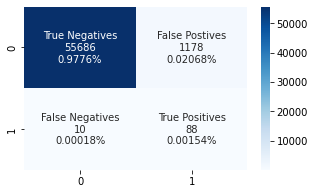


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [72]:
df_train_US = X_train_US.copy()
df_train_US['Class'] = y_train_US

df_fraud_US = fraud_dataset(df_train_US, y_train_US)
df_notfraud_US = not_fraud_dataset(df_train_US, y_train_US)

Ensemble_Classifier_1(5, df_fraud_US, df_notfraud_US, X_test, y_test, features, 'Class')
print()
print('-'*100)
print()
Ensemble_Classifier_2(5, df_fraud_US, df_notfraud_US, X_test, y_test, features, 'Class')

#### for oversampled dataset

accuracy score: 0.9995259997893332

f1 score: 0.8586387434554974

Confusion Matrix:-


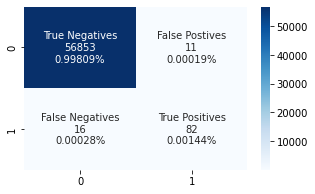


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.82      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------

accuracy score: 0.9995435553526912

f1 score: 0.8631578947368421

Confusion Matrix:-


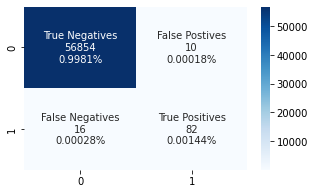


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [73]:
df_train_OS = X_train_OS.copy()
df_train_OS['Class'] = y_train_OS

df_fraud_OS = fraud_dataset(df_train_OS, y_train_OS)
df_notfraud_OS = not_fraud_dataset(df_train_OS, y_train_OS)

Ensemble_Classifier_1(5, df_fraud_OS, df_notfraud_OS, X_test, y_test, features, 'Class')
print()
print('-'*100)
print()
Ensemble_Classifier_2(5, df_fraud_OS, df_notfraud_OS, X_test, y_test, features, 'Class')

## Overall pipeline

In [74]:
all_features = df_raw.columns.tolist()[:-1]
# all_features

In [75]:
final_scaler = StandardScaler()
final_scaler.fit(np.array(df_raw['Amount']).reshape(-1,1))

StandardScaler()

In [76]:
final_model = RandomForestClassifier(n_estimators=25)
final_model.fit(X, y)

RandomForestClassifier(n_estimators=25)

In [77]:
def Pipeline(testset, final_model=final_model, final_scaler=final_scaler):
    '''
    Input: test dataset, final model
    
    Returns numpy array of predictions by the finally trained model
    '''
    testset = pd.DataFrame(testset).copy()
    testset.columns = all_features
    testset = testset.drop(columns=['Time'], axis=1)
    testset['Amount'] = final_scaler.transform(np.array(testset['Amount']).reshape(-1,1))
    
    predictions = np.array(final_model.predict(testset))
    
    return predictions
    